In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [23]:
df = pd.read_csv('/content/NSEBANK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2010,9031.900391,9129.450195,9031.900391,9112.349609,9112.349609,0.0
1,05-01-2010,9191.250000,9214.000000,9157.349609,9192.150391,9192.150391,0.0
2,06-01-2010,9243.900391,9265.549805,9183.650391,9223.000000,9223.000000,0.0
3,07-01-2010,9240.250000,9261.849609,9153.250000,9192.950195,9192.950195,0.0
4,08-01-2010,9185.049805,9214.349609,9141.450195,9160.700195,9160.700195,0.0


In [24]:
df=df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2010,9031.900391,9129.450195,9031.900391,9112.349609,9112.349609,0.0
1,05-01-2010,9191.250000,9214.000000,9157.349609,9192.150391,9192.150391,0.0
2,06-01-2010,9243.900391,9265.549805,9183.650391,9223.000000,9223.000000,0.0
3,07-01-2010,9240.250000,9261.849609,9153.250000,9192.950195,9192.950195,0.0
4,08-01-2010,9185.049805,9214.349609,9141.450195,9160.700195,9160.700195,0.0


In [25]:
A = df[['Open','High', 'Low', 'Adj Close', 'Volume']].values
b = df[['Close']].values

In [26]:
pip install pmdarima

In [64]:

# Import the library
from pmdarima import auto_arima

  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Open'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=14.88 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=35641.949, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=31477.223, Time=7.97 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=33783.478, Time=7.92 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=35686.212, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=32041.353, Time=0.97 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=31257.443, Time=24.81 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=43.95 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.97 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=35636.172, Time=5.28 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=31256.576, Time=25.43 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=31473.601, Time=8.70 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=58.84 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=21.12 sec
 ARIMA(3,0,0)(2,1,0)[12] int

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2205
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -15620.428
Date:                            Fri, 28 May 2021   AIC                          31254.856
Time:                                    11:28:59   BIC                          31294.708
Sample:                                         0   HQIC                         31269.421
                                           - 2205                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.6565      6.434      2.123      0.034       1.047      26.266
ar.L1          0.9709      0.016     59.708      0.000       0.939       1.003
ar.L2          0.0051      0.026      0.200      0.842      -0.045       0.056
ar.L3         -0.0407      0.017     -2.437      0.015      -0.074      -0.008
ar.S.L12      -0.6327      0.012    -52.059      0.000      -0.656      -0.609
ar.S.L24      -0.3098      0.014    -21.843      0.000      -0.338      -0.282
sigma2      8.697e+04   1292.880     67.269      0.000    8.44e+04    8.95e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              7235.05
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:

# Split data into train / test sets
train = df.iloc[0:1500]
test = df.iloc[1500:] # set one year(12 months) for testing
  
# Fit a SARIMAX(2, 0, 0)x(2, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Open'], 
                order = (3, 0, 0), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Open   No. Observations:                 1500
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -10443.948
Date:                            Fri, 28 May 2021   AIC                          20899.896
Time:                                    11:29:43   BIC                          20931.728
Sample:                                         0   HQIC                         20911.759
                                           - 1500                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9886      0.019     53.116      0.000       0.952       1.025
ar.L2         -0.0009      0.030     -0.028      0.977      -0.060       0.058
ar.L3         -0.0586      0.018     -3.246      0.001      -0.094      -0.023
ar.S.L12      -0.6109      0.016    -38.000      0.000      -0.642      -0.579
ar.S.L24      -0.2786      0.018    -15.846      0.000      -0.313      -0.244
sigma2      6.924e+04   1466.602     47.214      0.000    6.64e+04    7.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              2502.51
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

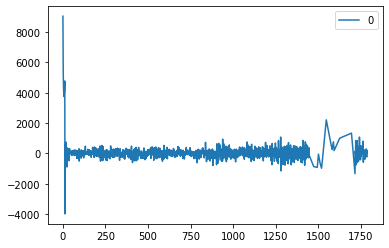

In [66]:
residuals = pd.DataFrame(result.resid)
residuals.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


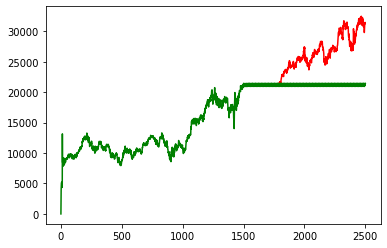

In [74]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.plot(test.Open[0:],color='r',label='test')
plt.plot(result.predict(0,2500),color='g',label='prediction')